### 목표
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 선형 분류 모델의 불확실성을 확인해보자
- 이미지 데이터의 형태를 이해해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

데이터 불러오기

In [3]:
digit_data = pd.read_csv('data/digit_train.csv')
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# label 실제답 데이터
# pixel0 ~ 문제 데이터 

In [4]:
# 데이터 크기
digit_data.shape
# 784 문제 데이터, 1 답 데이터

(42000, 785)

EDA 이미지 데이터 탐색

In [7]:
# 1개 이미지에 접근하여 데이터 탐색
# 1행 == 이미지 1장
img0 = digit_data.iloc[0,1:] # 이미지 특성 데이터 접근
# img0 값의 최댓값과 최솟값 확인
img0.min(), img0.max()

(0, 255)

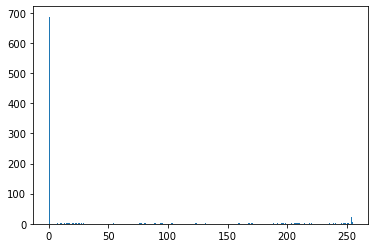

In [8]:
# 히스토그램 그래프
plt.hist(img0, bins = 255)
plt.show()

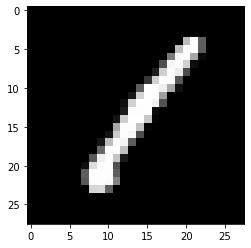

In [9]:
# 실제 이미지 출력
plt.imshow(img0.values.reshape(28,28), cmap = 'gray')
plt.show()

In [11]:
# 255 번째 행의 이미지 출력
img255 = digit_data.iloc[255,1:]
img255.min(), img255.max()

(0, 255)

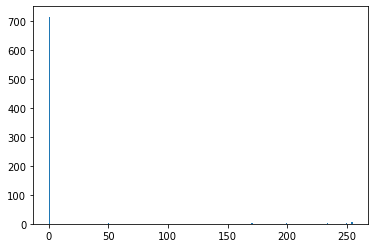

In [12]:
plt.hist(img255, bins= 255)
plt.show()

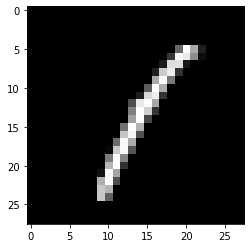

In [13]:
plt.imshow(img255.values.reshape(28,28), cmap = 'gray')
plt.show()

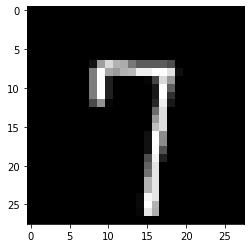

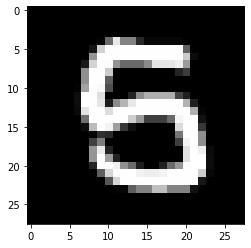

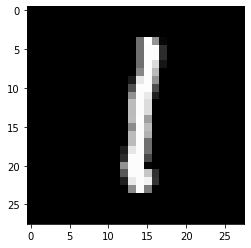

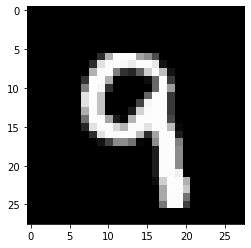

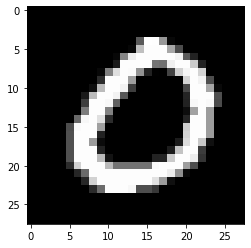

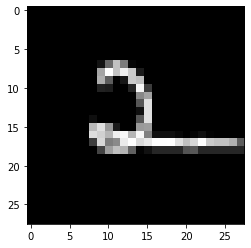

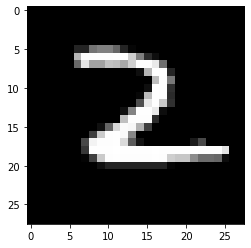

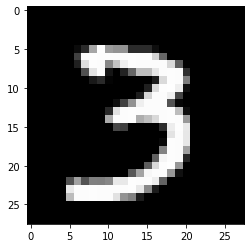

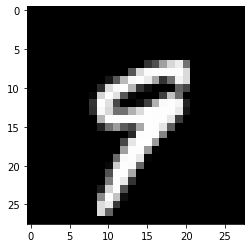

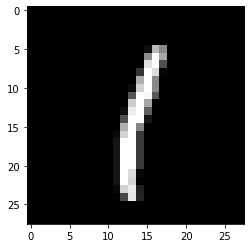

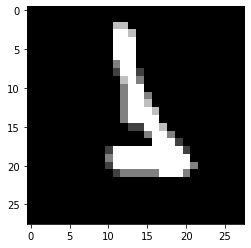

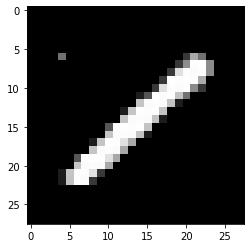

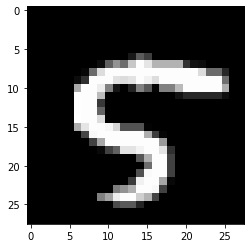

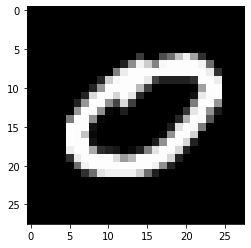

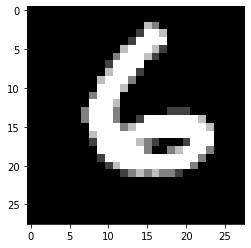

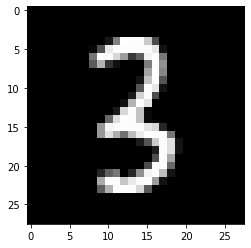

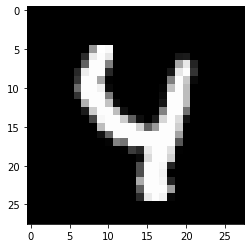

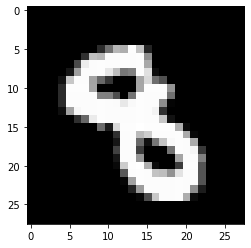

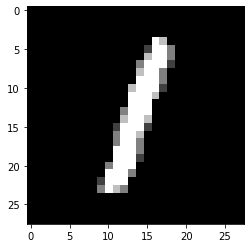

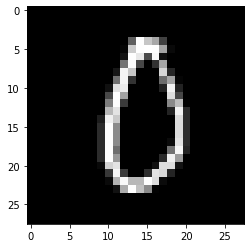

In [15]:
# 여러 이미지를 출력
for i in range(50,70):
    img = digit_data.iloc[i,1:]
    plt.imshow(img.values.reshape(28,28), cmap = 'gray')
    plt.show()

### 5000장 추출

In [16]:
X = digit_data.iloc[:5000,1:] # 문제 데이터
y = digit_data.iloc[:5000,0] # 답 데이터

In [17]:
print(X.shape, y.shape)

(5000, 784) (5000,)


### train, test 분리

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,
                                                random_state = 7)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3500, 784) (3500,)
(1500, 784) (1500,)


### 모델링

In [26]:
# 모델 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [27]:
# 모델 객체 생성
logi_model = LogisticRegression()
svc_model = LinearSVC()

In [28]:
# 일반화 성능 어떻게 될지 확인
from sklearn.model_selection import cross_val_score

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
logi_result = cross_val_score(logi_model, X_train,y_train, cv = 5)
svc_result = cross_val_score(svc_model, X_train, y_train, cv = 5)
print('logi평균:', logi_result.mean())
print('svc평균:', svc_result.mean())

logi평균: 0.8760000000000001
svc평균: 0.8220000000000001


#### 스케일링 

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max_sc = MinMaxScaler()

In [34]:
min_max_sc.fit(X_train)

MinMaxScaler()

In [35]:
X_train_sc = min_max_sc.transform(X_train)
X_test_sc = min_max_sc.transform(X_test)

(array([570.,  16.,  11.,   8.,   6.,  20.,  15.,   8.,  11., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

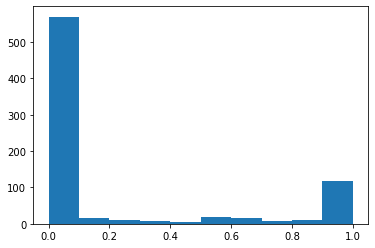

In [36]:
plt.hist(X_train_sc[0])

In [37]:
svm_result2 = cross_val_score(svm_model, X_train_sc, y_train, cv = 5)
print('sc조정 후 교차검증 평균:', svm_result2.mean())

sc조정 후 교차검증 평균: 0.8628571428571428


In [38]:
# 모델 학습
logi_model.fit(X_train,y_train)
svm_model.fit(X_train_sc, y_train)

LinearSVC()

In [40]:
# 모델 정확도
print(logi_model.score(X_test,y_test))
print(svm_model.score(X_test_sc, y_test))

0.8746666666666667
0.8593333333333333


### 예측의 불확실성

In [48]:
logi_model.predict_proba(X_test[:20])

array([[1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 

### 분류성능평가지표

In [50]:
from sklearn.metrics import classification_report

In [51]:
pre = logi_model.predict(X_test)
pre

array([0, 0, 1, ..., 8, 8, 1], dtype=int64)

In [52]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       152
           1       0.96      0.92      0.94       172
           2       0.89      0.88      0.88       164
           3       0.87      0.81      0.84       149
           4       0.90      0.91      0.90       137
           5       0.76      0.83      0.80       131
           6       0.91      0.93      0.92       162
           7       0.86      0.88      0.87       150
           8       0.77      0.80      0.78       134
           9       0.85      0.82      0.84       149

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.88      0.87      0.88      1500



In [ ]:
# np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})